In [2]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

# 1.0 Uppvärmning

Done!

# 1.1 Movielens full - EDA

In [3]:
movies, ratings = pd.read_csv('../data/movies.csv'), pd.read_csv('../data/ratings.csv')

### a.1) Movies EDA

In [4]:
# Display all the columns that are in the movies dataset
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [5]:
# Values in the genres column
movies.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Action|Adventure|Comedy|Horror|Sci-Fi|Thriller',
       'Children|Fantasy|Horror|Mystery|Sci-Fi|Thriller',
       'Adventure|Animation|Crime'], dtype=object)

In [6]:
#Count all unique genres as they appear in the dataset
movies.genres.nunique()

1643

In [7]:
#Count of all the unique movies in the dataset. 
movies.title.nunique()

58020

In [8]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [9]:
# Creating a new column with just years by using string.extract(). The \d{4} matches any 4 consegative digits in the string 
# in this pattern '\((\d{4})\)'
movies['year']  = movies['title'].str.extract(r'\((\d{4})\)')

movies

movieId                                    title  \
0            1                         Toy Story (1995)   
1            2                           Jumanji (1995)   
2            3                  Grumpier Old Men (1995)   
3            4                 Waiting to Exhale (1995)   
4            5       Father of the Bride Part II (1995)   
...        ...                                      ...   
58093   193876                  The Great Glinka (1946)   
58094   193878  Les tribulations d'une caissière (2011)   
58095   193880                 Her Name Was Mumu (2016)   
58096   193882                             Flora (2017)   
58097   193886                              Leal (2018)   

                                            genres  year  
0      Adventure|Animation|Children|Comedy|Fantasy  1995  
1                       Adventure|Children|Fantasy  1995  
2                                   Comedy|Romance  1995  
3                             Comedy|Drama|Romance  1995  
4                                           Comedy  1995  
...                                            ...   ...  
58093                           (no genres listed)  1946  
58094                                       Comedy  2011  
58095                                        Drama  2016  
58096                Adventure|Drama|Horror|Sci-Fi  2017  
58097                           Action|Crime|Drama  2018  

[58098 rows x 4 columns]

In [10]:
# I used chatGPT is his exercise to split the strings in every genres to return a unique genere
# I assume the most likely genre is the first string before the seperator 
genres_df = movies['genres'].str.get_dummies('|')

# calculate the most common genres for each movie
movies['most_common_genre'] = genres_df.apply(lambda x: x.idxmax(), axis=1)

movies

movieId                                    title  \
0            1                         Toy Story (1995)   
1            2                           Jumanji (1995)   
2            3                  Grumpier Old Men (1995)   
3            4                 Waiting to Exhale (1995)   
4            5       Father of the Bride Part II (1995)   
...        ...                                      ...   
58093   193876                  The Great Glinka (1946)   
58094   193878  Les tribulations d'une caissière (2011)   
58095   193880                 Her Name Was Mumu (2016)   
58096   193882                             Flora (2017)   
58097   193886                              Leal (2018)   

                                            genres  year   most_common_genre  
0      Adventure|Animation|Children|Comedy|Fantasy  1995           Adventure  
1                       Adventure|Children|Fantasy  1995           Adventure  
2                                   Comedy|Romance  1995              Comedy  
3                             Comedy|Drama|Romance  1995              Comedy  
4                                           Comedy  1995              Comedy  
...                                            ...   ...                 ...  
58093                           (no genres listed)  1946  (no genres listed)  
58094                                       Comedy  2011              Comedy  
58095                                        Drama  2016               Drama  
58096                Adventure|Drama|Horror|Sci-Fi  2017           Adventure  
58097                           Action|Crime|Drama  2018              Action  

[58098 rows x 5 columns]

In [11]:
movies

movieId                                    title  \
0            1                         Toy Story (1995)   
1            2                           Jumanji (1995)   
2            3                  Grumpier Old Men (1995)   
3            4                 Waiting to Exhale (1995)   
4            5       Father of the Bride Part II (1995)   
...        ...                                      ...   
58093   193876                  The Great Glinka (1946)   
58094   193878  Les tribulations d'une caissière (2011)   
58095   193880                 Her Name Was Mumu (2016)   
58096   193882                             Flora (2017)   
58097   193886                              Leal (2018)   

                                            genres  year   most_common_genre  
0      Adventure|Animation|Children|Comedy|Fantasy  1995           Adventure  
1                       Adventure|Children|Fantasy  1995           Adventure  
2                                   Comedy|Romance  1995              Comedy  
3                             Comedy|Drama|Romance  1995              Comedy  
4                                           Comedy  1995              Comedy  
...                                            ...   ...                 ...  
58093                           (no genres listed)  1946  (no genres listed)  
58094                                       Comedy  2011              Comedy  
58095                                        Drama  2016               Drama  
58096                Adventure|Drama|Horror|Sci-Fi  2017           Adventure  
58097                           Action|Crime|Drama  2018              Action  

[58098 rows x 5 columns]

In [12]:
# After creating the new year column, I dropped all columns where the year is NaN. There were only about less than 400 rows
# This amount will likely not affect the outcome of any research on the data
movies = movies.dropna(subset=['year'], how='any')

In [13]:
# Just checking if any rows are NaN
nan_rows = movies[movies.isna().any(axis=1)]
nan_rows

Empty DataFrame
Columns: [movieId, title, genres, year, most_common_genre]
Index: []

In [14]:
#Converting the string years as intergers

movies['year'] = movies['year'].astype('int32')

/var/folders/z0/17ykh1n151x8y8rfk6dfkv500000gn/T/ipykernel_53842/3849965137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['year'] = movies['year'].astype('int32')


In [15]:
# Checking the oldest and newest movies in the datasets

movies['year'].max(), movies['year'].min()

(2018, 1874)

In [16]:
#Grouping the dataset into most common genres by the new genre column created earlier

common_genres = movies.groupby('most_common_genre').agg({'title':'count'}).reset_index()

common_genres

most_common_genre  title
0   (no genres listed)   4054
1               Action   7114
2            Adventure   2399
3            Animation   1816
4             Children   1267
5               Comedy  12970
6                Crime   2887
7          Documentary   4679
8                Drama  14339
9              Fantasy    325
10           Film-Noir     38
11              Horror   3127
12                IMAX      4
13             Musical    108
14             Mystery    358
15             Romance    371
16              Sci-Fi    443
17            Thriller    833
18                 War     88
19             Western    551

Text(0.5, 1.0, 'Most Common Genres in the dataset')

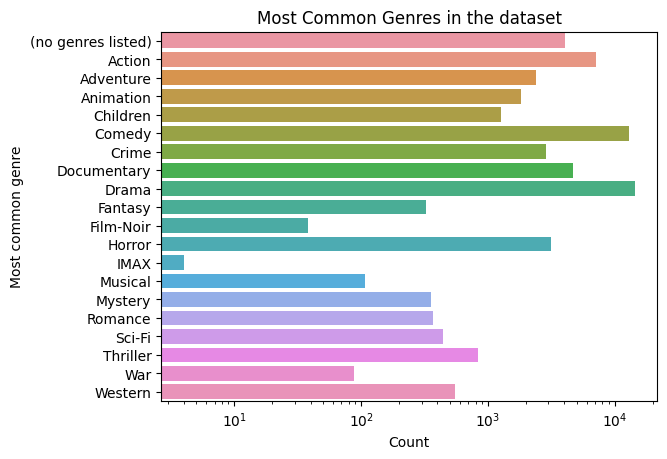

In [65]:
fig = plt.subplot()

sns.barplot(data=common_genres, y='most_common_genre', x='title')
fig.set_xscale('log')
fig.set_xlabel('Count')
fig.set_ylabel('Most common genre')
fig.set_title('Most Common Genres in the dataset')

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57771 entries, 0 to 58097
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movieId            57771 non-null  int64 
 1   title              57771 non-null  object
 2   genres             57771 non-null  object
 3   year               57771 non-null  int32 
 4   most_common_genre  57771 non-null  object
dtypes: int32(1), int64(1), object(3)
memory usage: 2.4+ MB


In [19]:
movies.describe().T

count           mean           std     min      25%       50%  \
movieId  57771.0  111636.410673  59889.476538     1.0  72067.5  126028.0   
year     57771.0    1991.399249     24.947698  1874.0   1976.0    2001.0   

              75%       max  
movieId  161239.0  193886.0  
year       2011.0    2018.0

Text(0, 0.5, 'Count')

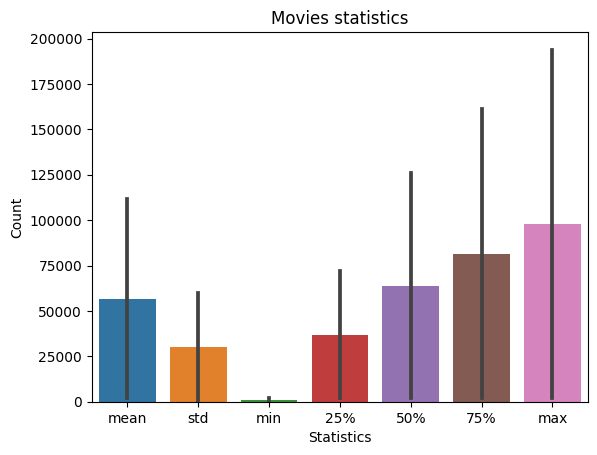

In [20]:
fig = plt.subplot(111)
movies_description = movies.describe().T.drop('count', axis=1)
columns = movies_description.columns

sns.barplot(data=movies_description)
fig.set_title('Movies statistics')
fig.set_xlabel('Statistics')
fig.set_ylabel('Count')

### a.2) Ratings EDA

In [21]:
ratings.head()

userId  movieId  rating   timestamp
0       1      307     3.5  1256677221
1       1      481     3.5  1256677456
2       1     1091     1.5  1256677471
3       1     1257     4.5  1256677460
4       1     1449     4.5  1256677264

In [22]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [23]:
ratings.describe().T

count          mean           std          min          25%  \
userId     27753444.0  1.419420e+05  8.170740e+04          1.0      71176.0   
movieId    27753444.0  1.848800e+04  3.510263e+04          1.0       1097.0   
rating     27753444.0  3.530445e+00  1.066353e+00          0.5          3.0   
timestamp  27753444.0  1.193122e+09  2.160482e+08  789652004.0  998605251.0   

                    50%           75%           max  
userId     1.420220e+05  2.124590e+05  2.832280e+05  
movieId    2.716000e+03  7.150000e+03  1.938860e+05  
rating     3.500000e+00  4.000000e+00  5.000000e+00  
timestamp  1.174256e+09  1.422744e+09  1.537945e+09

In [24]:
ratings['userId'].value_counts

<bound method IndexOpsMixin.value_counts of 0                1
1                1
2                1
3                1
4                1
             ...  
27753439    283228
27753440    283228
27753441    283228
27753442    283228
27753443    283228
Name: userId, Length: 27753444, dtype: int64>

In [66]:
userId_df = ratings.groupby('userId').agg({'movieId':'count', 'rating':'count'}).reset_index()
userId_df

userId  movieId  rating
0            1       16      16
1            2       15      15
2            3       11      11
3            4      736     736
4            5       72      72
...        ...      ...     ...
283223  283224      329     329
283224  283225       20      20
283225  283226       11      11
283226  283227       17      17
283227  283228      113     113

[283228 rows x 3 columns]

In [67]:
userId_df[userId_df['movieId'] > 2000]

userId  movieId  rating
1271      1272     2145    2145
2024      2025     3238    3238
2149      2150     2966    2966
2293      2294     2762    2762
2328      2329     2346    2346
...        ...      ...     ...
280584  280585     2090    2090
280867  280868     2221    2221
281630  281631     2589    2589
281789  281790     3449    3449
282999  283000     2133    2133

[423 rows x 3 columns]

In [26]:
userId_df['rating'].max(), userId_df['rating'].mode()[0], 

(23715, 15)

In [27]:
mask = userId_df['rating'].between(1, 50).sum()
mask

175083

(0.0, 500.0)

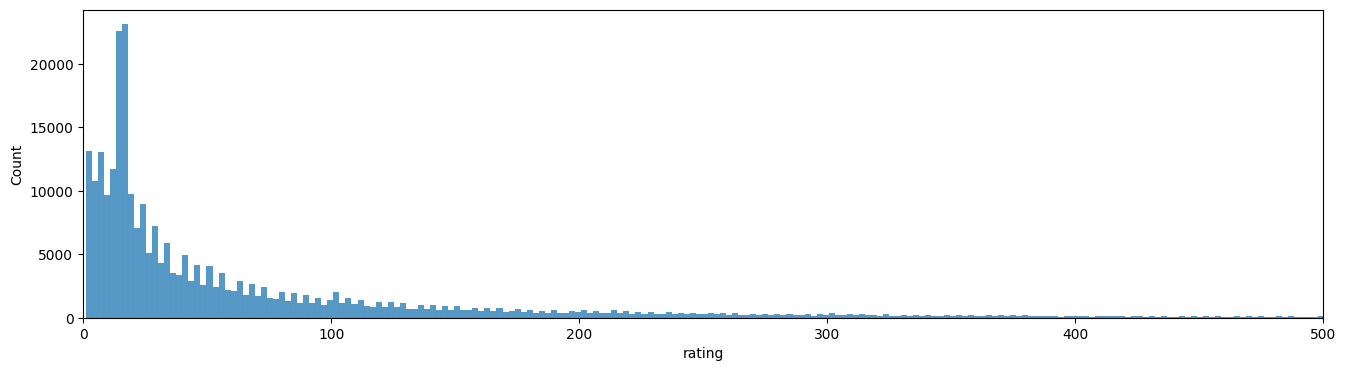

In [28]:
fig = plt.figure(figsize=(16,4))
sns.histplot(data=userId_df, x="rating" )
plt.xlim(0,500)


In [71]:
fig = px.histogram(userId_df, x="rating", title='Amount of totatal ratings per User')
fig.update_xaxes(range=[0, 2000])

fig.show()

In [30]:
rating_df = ratings.groupby('rating').agg({'movieId':'count', 'userId':'count'}).reset_index()
rating_df

rating  movieId   userId
0     0.5   442388   442388
1     1.0   886233   886233
2     1.5   441354   441354
3     2.0  1850627  1850627
4     2.5  1373419  1373419
5     3.0  5515668  5515668
6     3.5  3404360  3404360
7     4.0  7394710  7394710
8     4.5  2373550  2373550
9     5.0  4071135  4071135

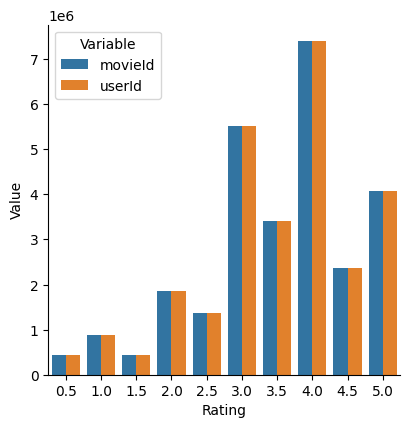

In [72]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(221)
rating_df_melted = rating_df.melt(id_vars='rating').rename(columns=str.title)
columns = ['movieId','userId']

sns.barplot(x='Rating', y='Value', hue='Variable', data=rating_df_melted, ax=ax1)
sns.despine(fig)


---

## b.) Vilka är de 10 filmerna med flest ratings?

In [32]:
ratings.head()

userId  movieId  rating   timestamp
0       1      307     3.5  1256677221
1       1      481     3.5  1256677456
2       1     1091     1.5  1256677471
3       1     1257     4.5  1256677460
4       1     1449     4.5  1256677264

In [33]:
most_movie_ratings = ratings.groupby('movieId').agg({'rating':'count'}).reset_index().sort_values(by='rating', ascending=False)
most_movie_ratings.head()

movieId  rating
315       318   97999
352       356   97040
293       296   92406
587       593   87899
2487     2571   84545

In [34]:
top10_most_movie_ratings = most_movie_ratings.head(10)
top10_most_movie_ratings

movieId  rating
315       318   97999
352       356   97040
293       296   92406
587       593   87899
2487     2571   84545
257       260   81815
476       480   76451
523       527   71516
108       110   68803
0           1   68469

In [35]:
top10_movie_id = top10_most_movie_ratings['movieId'].to_numpy()
top10_movie_id

array([ 318,  356,  296,  593, 2571,  260,  480,  527,  110,    1])

In [36]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year most_common_genre  
0  Adventure|Animation|Children|Comedy|Fantasy  1995         Adventure  
1                   Adventure|Children|Fantasy  1995         Adventure  
2                               Comedy|Romance  1995            Comedy  
3                         Comedy|Drama|Romance  1995            Comedy  
4                                       Comedy  1995            Comedy

In [37]:
result = movies[movies['movieId'].isin(top10_movie_id)]

In [74]:
result

movieId                                      title  \
0           1                           Toy Story (1995)   
108       110                          Braveheart (1995)   
257       260  Star Wars: Episode IV - A New Hope (1977)   
293       296                        Pulp Fiction (1994)   
315       318           Shawshank Redemption, The (1994)   
352       356                        Forrest Gump (1994)   
476       480                       Jurassic Park (1993)   
523       527                    Schindler's List (1993)   
587       593           Silence of the Lambs, The (1991)   
2487     2571                         Matrix, The (1999)   

                                           genres  year most_common_genre  
0     Adventure|Animation|Children|Comedy|Fantasy  1995         Adventure  
108                              Action|Drama|War  1995            Action  
257                       Action|Adventure|Sci-Fi  1977            Action  
293                   Comedy|Crime|Drama|Thriller  1994            Comedy  
315                                   Crime|Drama  1994             Crime  
352                      Comedy|Drama|Romance|War  1994            Comedy  
476              Action|Adventure|Sci-Fi|Thriller  1993            Action  
523                                     Drama|War  1993             Drama  
587                         Crime|Horror|Thriller  1991             Crime  
2487                       Action|Sci-Fi|Thriller  1999            Action

In [75]:
result1 = pd.merge(result, top10_most_movie_ratings, on='movieId')
result1

movieId                                      title  \
0        1                           Toy Story (1995)   
1      110                          Braveheart (1995)   
2      260  Star Wars: Episode IV - A New Hope (1977)   
3      296                        Pulp Fiction (1994)   
4      318           Shawshank Redemption, The (1994)   
5      356                        Forrest Gump (1994)   
6      480                       Jurassic Park (1993)   
7      527                    Schindler's List (1993)   
8      593           Silence of the Lambs, The (1991)   
9     2571                         Matrix, The (1999)   

                                        genres  year most_common_genre  rating  
0  Adventure|Animation|Children|Comedy|Fantasy  1995         Adventure   68469  
1                             Action|Drama|War  1995            Action   68803  
2                      Action|Adventure|Sci-Fi  1977            Action   81815  
3                  Comedy|Crime|Drama|Thriller  1994            Comedy   92406  
4                                  Crime|Drama  1994             Crime   97999  
5                     Comedy|Drama|Romance|War  1994            Comedy   97040  
6             Action|Adventure|Sci-Fi|Thriller  1993            Action   76451  
7                                    Drama|War  1993             Drama   71516  
8                        Crime|Horror|Thriller  1991             Crime   87899  
9                       Action|Sci-Fi|Thriller  1999            Action   84545

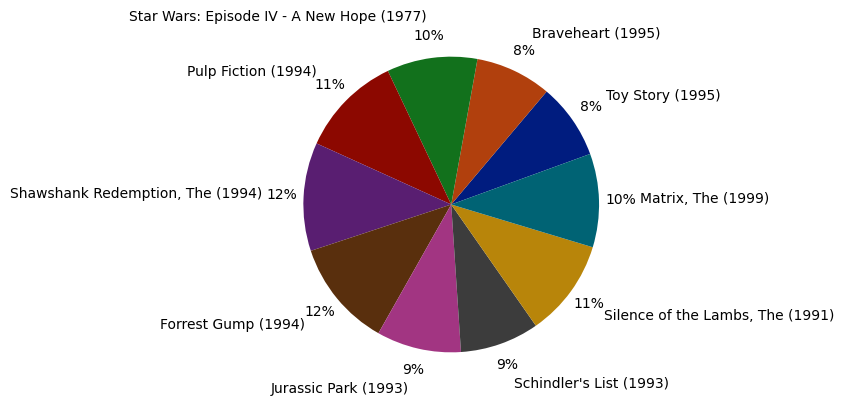

In [77]:
pallete_color = sns.color_palette('dark')
# explode = [0, 0.08, 0, 0, 0,0, 0.1, 0, 0.05, 0]

plt.pie(data=result1, x='rating', labels='title', colors=pallete_color,autopct='%.00f%%', startangle=20,pctdistance=1.15, labeldistance=1.28);

In [81]:
fig = px.bar(result1, x='title', y='rating', title='Most rated movies', color='year')
fig.show()

---

## 1.) Average rating for the top 10 movies

In [40]:
mean_top_10_movie_ratings = ratings[ratings['movieId'].isin(top10_movie_id)]
mean_top_10_movie_ratings

userId  movieId  rating   timestamp
42             4        1     4.0  1113765937
73             4      110     4.5  1113767070
102            4      260     4.5  1127947466
107            4      296     5.0  1113767056
111            4      318     5.0  1113766505
...          ...      ...     ...         ...
27753334  283228      260     5.0  1354137541
27753337  283228      356     4.0  1379882776
27753340  283228      480     4.5  1379882824
27753343  283228      593     5.0  1354159657
27753398  283228     2571     5.0  1354137530

[826943 rows x 4 columns]

In [41]:
mean_top_10_movie_ratings = mean_top_10_movie_ratings.groupby('movieId').agg({'rating':'mean'}).reset_index()
mean_top_10_movie_ratings= mean_top_10_movie_ratings.rename(columns={'rating':'mean_rating'})
mean_top_10_movie_ratings

movieId  mean_rating
0        1     3.886649
1      110     4.008481
2      260     4.120455
3      296     4.173971
4      318     4.424188
5      356     4.056585
6      480     3.665034
7      527     4.257502
8      593     4.151412
9     2571     4.149695

In [42]:
result

movieId                                      title  \
0           1                           Toy Story (1995)   
108       110                          Braveheart (1995)   
257       260  Star Wars: Episode IV - A New Hope (1977)   
293       296                        Pulp Fiction (1994)   
315       318           Shawshank Redemption, The (1994)   
352       356                        Forrest Gump (1994)   
476       480                       Jurassic Park (1993)   
523       527                    Schindler's List (1993)   
587       593           Silence of the Lambs, The (1991)   
2487     2571                         Matrix, The (1999)   

                                           genres  year most_common_genre  
0     Adventure|Animation|Children|Comedy|Fantasy  1995         Adventure  
108                              Action|Drama|War  1995            Action  
257                       Action|Adventure|Sci-Fi  1977            Action  
293                   Comedy|Crime|Drama|Thriller  1994            Comedy  
315                                   Crime|Drama  1994             Crime  
352                      Comedy|Drama|Romance|War  1994            Comedy  
476              Action|Adventure|Sci-Fi|Thriller  1993            Action  
523                                     Drama|War  1993             Drama  
587                         Crime|Horror|Thriller  1991             Crime  
2487                       Action|Sci-Fi|Thriller  1999            Action

In [43]:
mean_top = pd.merge(result, mean_top_10_movie_ratings, on='movieId', how='outer')

In [44]:
fig = px.bar(mean_top, x='title', y='mean_rating', title='mean rating for top 10 rated movies', color='most_common_genre')
fig.show()

---

## 1.d 

In [45]:
movies

movieId                                    title  \
0            1                         Toy Story (1995)   
1            2                           Jumanji (1995)   
2            3                  Grumpier Old Men (1995)   
3            4                 Waiting to Exhale (1995)   
4            5       Father of the Bride Part II (1995)   
...        ...                                      ...   
58093   193876                  The Great Glinka (1946)   
58094   193878  Les tribulations d'une caissière (2011)   
58095   193880                 Her Name Was Mumu (2016)   
58096   193882                             Flora (2017)   
58097   193886                              Leal (2018)   

                                            genres  year   most_common_genre  
0      Adventure|Animation|Children|Comedy|Fantasy  1995           Adventure  
1                       Adventure|Children|Fantasy  1995           Adventure  
2                                   Comedy|Romance  1995              Comedy  
3                             Comedy|Drama|Romance  1995              Comedy  
4                                           Comedy  1995              Comedy  
...                                            ...   ...                 ...  
58093                           (no genres listed)  1946  (no genres listed)  
58094                                       Comedy  2011              Comedy  
58095                                        Drama  2016               Drama  
58096                Adventure|Drama|Horror|Sci-Fi  2017           Adventure  
58097                           Action|Crime|Drama  2018              Action  

[57771 rows x 5 columns]

In [46]:
movies_by_year = movies.groupby('year').agg({'title':'count'}).reset_index()
movies_by_year

year  title
0    1874      1
1    1878      1
2    1883      1
3    1887      1
4    1888      4
..    ...    ...
129  2014   2297
130  2015   2312
131  2016   2219
132  2017   1891
133  2018    861

[134 rows x 2 columns]

In [47]:
movies.describe()

movieId          year
count   57771.000000  57771.000000
mean   111636.410673   1991.399249
std     59889.476538     24.947698
min         1.000000   1874.000000
25%     72067.500000   1976.000000
50%    126028.000000   2001.000000
75%    161239.000000   2011.000000
max    193886.000000   2018.000000

In [48]:
# some inspiration drawn from here
# https://www.geeksforgeeks.org/how-to-make-range-slider-and-selector-in-plotly/
import plotly.graph_objects as go
import plotly_express as px

plot = go.Figure(data=[go.Bar(x=movies_by_year["year"], y=movies_by_year["title"])])

plot.update_layout(
    xaxis = dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, step="year", stepmode="backward"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        title='Year'
    ),
    yaxis = dict(
        range=[0, 3000],
        title='Movie count'
        ),
    title='Total amount of movies per year over time'
)

plot.show()


---

## 1.e

In [49]:
rating_df

rating  movieId   userId
0     0.5   442388   442388
1     1.0   886233   886233
2     1.5   441354   441354
3     2.0  1850627  1850627
4     2.5  1373419  1373419
5     3.0  5515668  5515668
6     3.5  3404360  3404360
7     4.0  7394710  7394710
8     4.5  2373550  2373550
9     5.0  4071135  4071135

Text(0, 0.5, 'Count')

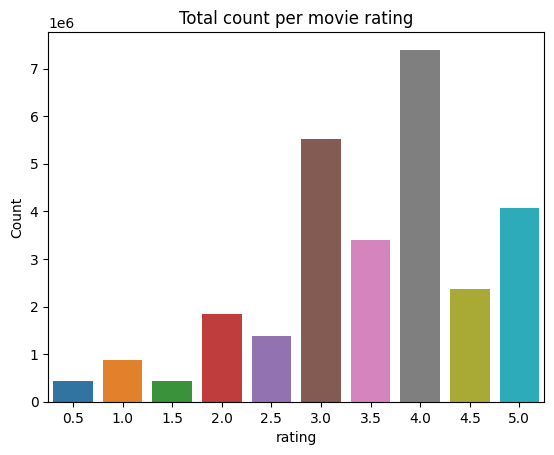

In [50]:
sns.barplot(data=rating_df, x='rating', y='movieId')
plt.title('Total count per movie rating')
plt.ylabel('Count')

---

## Self continuation EDA

In [84]:
combined_dataset = pd.merge(movies, ratings, on='movieId')
combined_dataset.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   year most_common_genre  userId  rating   timestamp  
0  1995         Adventure       4     4.0  1113765937  
1  1995         Adventure      10     5.0   948885850  
2  1995         Adventure      14     4.5  1442169375  
3  1995         Adventure      15     4.0  1370810063  
4  1995         Adventure      22     4.0  1237622631